## Задание 1

In [107]:
# Импорт pandas
import pandas as pd
from PIL.ImageColor import colormap

In [108]:
# Загрузка набора данных Iris (данные о длине и ширине чашелистика и листиков ириса)
# Загрузка данных из CSV-файла
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

## Задание 2

In [109]:
# Вывод первых строк для проверки данных
print("Первые строки набора данных:")
print(df.head())

Первые строки набора данных:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [110]:
# Описание данных
print("\nИнформация о данных:")
df.info()


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
# Проверка на наличие пропусков
missing_values = df.isnull().sum()
print("\nКоличество пропусков в каждом столбце:")
print(missing_values)


Количество пропусков в каждом столбце:
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


## Задание 3

In [112]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio

df_setosa = df[df['species'] == 'setosa']
df_versicolor = df[df['species'] == 'versicolor']
df_virginica = df[df['species'] == 'virginica']

fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Setosa", "Versicolor", "Virginica")
)
# Добавление подграфиков очень крутым циклом
for col_num, iris_df in zip(range(1, 4), [df_setosa, df_versicolor, df_virginica]):
    fig.add_trace(
        go.Bar(
            x=iris_df.index, 
            y=iris_df['sepal_length'],
            marker=dict(color=iris_df['sepal_length'], coloraxis="coloraxis", line=dict(color='black', width=2))
        ),
        row=1, col=col_num
    )
fig.update_xaxes(title_text="Индекс", tickangle=315, tickfont=dict(size=14), gridcolor='ivory', gridwidth=2, row=1, col=2)  # Надпись "Индекс" по центру 
fig.update_layout(
    title=dict(text="Столбчатая диаграмма по видам ириса", x=0.5, font=dict(size=20)),
    yaxis=dict(title=dict(text="Длина чашелистика (см)", font=dict(size=16)), tickfont=dict(size=14), gridcolor='ivory', gridwidth=2),
    width=1000,
    height=700,
    coloraxis_showscale=False,
    showlegend=False
)
# Убираем лишние отступы
fig.update_layout(margin=dict(l=0, r=0, t=50, b=0))
pio.show(fig)

## Задание 4

In [113]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.io as pio
import pandas as pd

df_tmp = df.copy()
df_tmp['sepal_length_category'] = pd.cut(       # Разбивка длины чашелистика на категории
    df_tmp['sepal_length'], 
    bins=[4, 5, 6, 8],                      # Границы для разбивки (например, маленькая, средняя, большая)
    labels=['Маленькая длина', 'Средняя длина', 'Большая длина']  # Категории
)
# Подсчет количества экземпляров для каждой категории и каждого вида
category_counts = df_tmp.groupby(['species', 'sepal_length_category']).size().reset_index(name='counts')
# Создание фигуры с 3 подграфиками (1 ряд, 3 столбца)
fig = make_subplots(
    rows=1, cols=3,
    subplot_titles=("Setosa", "Versicolor", "Virginica"),
    specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]]  # Тип подграфиков — круговые диаграммы
)
for col_num, species in zip(range(1, 4), df_tmp['species'].unique()):       # Ещё один крутой цикл
    subset = category_counts[category_counts['species'] == species]     # Данные для каждого вида
    fig.add_trace(
        go.Pie(
            labels=subset['sepal_length_category'],                     # Категории длины чашелистика
            values=subset['counts'],                                    # Количество экземпляров
            name=species,                                               # Имя графика (вид ириса)
            marker=dict(line=dict(color='black', width=2))              # Черные границы
        ),
        row=1, col=col_num
    )
fig.update_layout(                                                      # Настройки общего графика
    title=dict(text="Распределение длины чашелистика среди видов ириса", x=0.5, font=dict(size=20)),
    width=1000,
    height=700,
    showlegend=False                                                    # Внутри диаграммы есть подпись так что зачем? нет причины
)
# Отображение графика
pio.show(fig)

C:\Users\1\AppData\Local\Temp\ipykernel_22376\803959655.py:13: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



## Задание 5

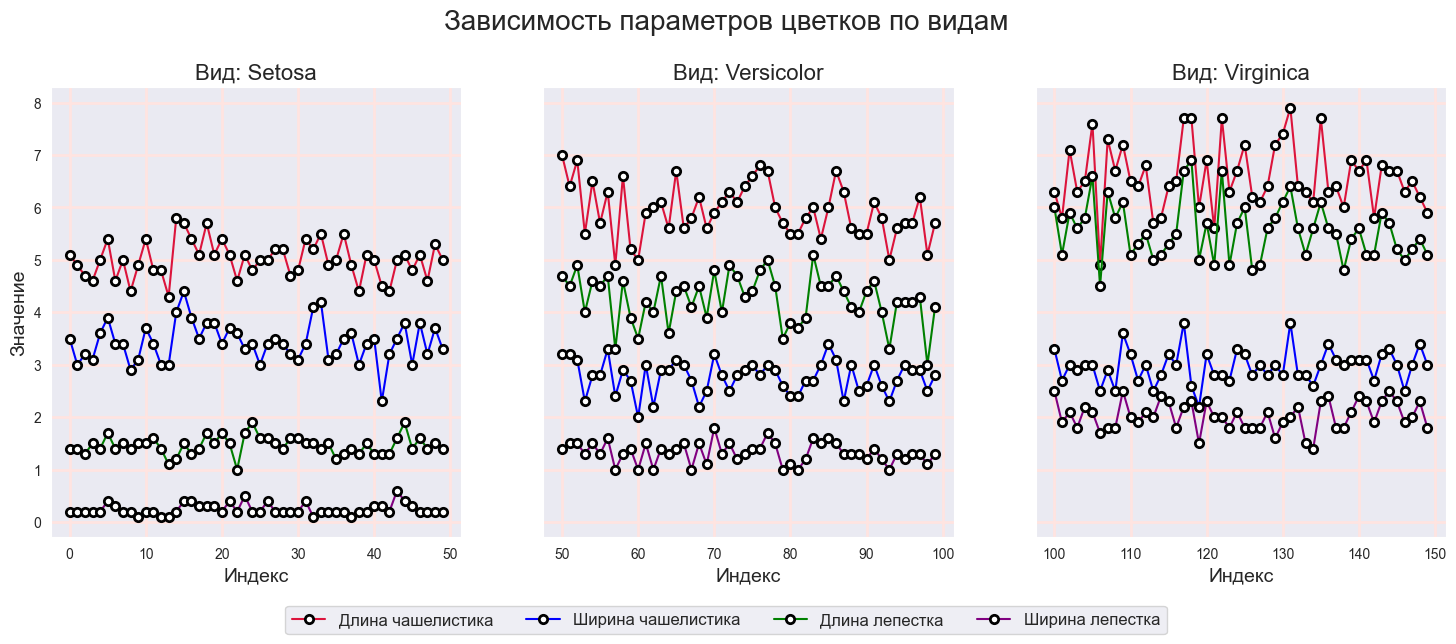

In [114]:
import matplotlib.pyplot as plt

# Список уникальных видов ирисов
species = df['species'].unique()
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
species_names = ['Setosa', 'Versicolor', 'Virginica']
colors = ['crimson', 'blue', 'green', 'purple']
for i, species_type in enumerate(species):
    # Фильтрация данных по виду
    df_species = df[df['species'] == species_type]
    # Построение графиков для каждого параметра
    axes[i].plot(df_species.index, df_species['sepal_length'], label='Длина чашелистика', color=colors[0], marker='o', 
                 markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
    axes[i].plot(df_species.index, df_species['sepal_width'], label='Ширина чашелистика', color=colors[1], marker='o', 
                 markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
    axes[i].plot(df_species.index, df_species['petal_length'], label='Длина лепестка', color=colors[2], marker='o', 
                 markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
    axes[i].plot(df_species.index, df_species['petal_width'], label='Ширина лепестка', color=colors[3], marker='o', 
                 markerfacecolor='white', markeredgecolor='black', markeredgewidth=2)
    # Настройка заголовков и меток
    axes[i].set_title(f'Вид: {species_names[i]}', fontsize=16)
    axes[i].set_xlabel('Индекс', fontsize=14)
    if i == 0:
        axes[i].set_ylabel('Значение', fontsize=14)
    # Сетка на каждом подграфике
    axes[i].grid(True, color='mistyrose', linewidth=2)

plt.suptitle('Зависимость параметров цветков по видам', fontsize=20)
plt.subplots_adjust(top=0.85, bottom=0.1)
fig.legend(['Длина чашелистика', 'Ширина чашелистика', 'Длина лепестка', 'Ширина лепестка'], loc='upper center', 
           bbox_to_anchor=(0.5, 0.0), ncol=4, fontsize=12)

# Показываем графики
plt.show()


## Задание 6

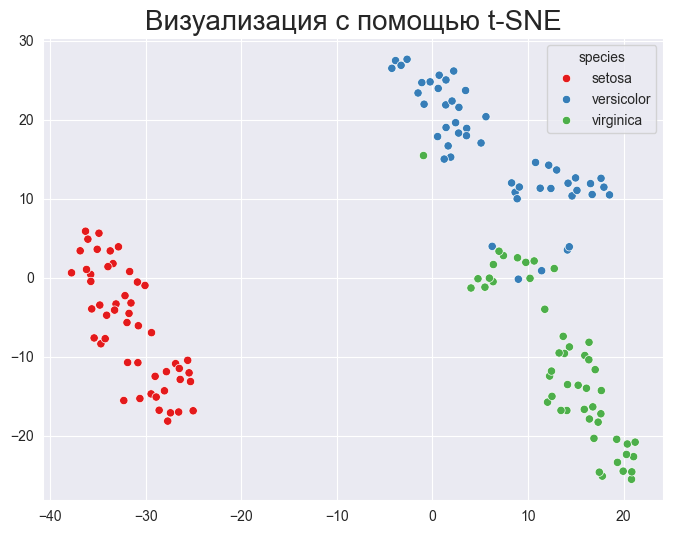

Время работы t-SNE: 0.5841400623321533 секунд


In [120]:
# Импорт библиотеки для t-SNE
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
import time

# Применение t-SNE (сначала отберем числовые столбцы для анализа)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
start_time = time.time()
tsne_result = tsne.fit_transform(df.iloc[:, :-1])  # Используем все признаки, кроме 'species'
tsne_time = time.time() - start_time

# Построение t-SNE с использованием столбца species для классификации
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=df['species'], palette='Set1')
plt.title("Визуализация с помощью t-SNE", fontsize=20)
plt.show()

print(f"Время работы t-SNE: {tsne_time} секунд")

## Задание 7

C:\Users\1\PycharmProjects\MIREA-TIIABD\.venv\lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



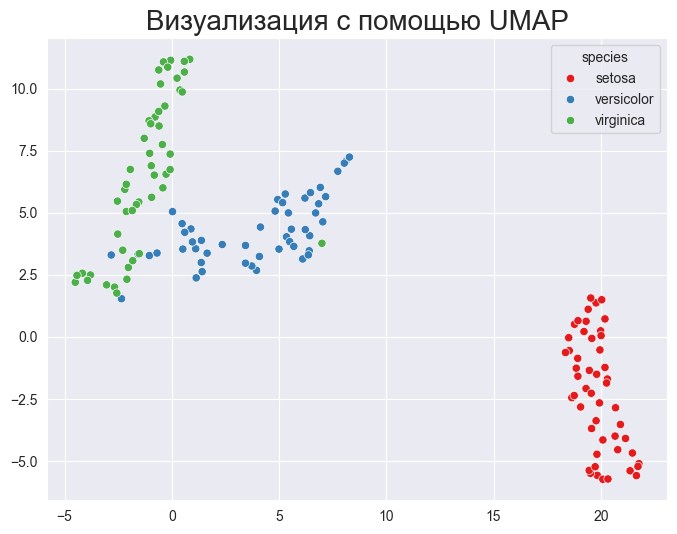

Время работы UMAP: 1.619713306427002 секунд


In [121]:
# Импорт библиотек для UMAP и времени
import umap.umap_ as umap   # pip install umap-learn, numpy<=2.0.0

# UMAP с различными параметрами
start_time = time.time()
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
umap_result = umap_model.fit_transform(df.iloc[:, :-1])
umap_time = time.time() - start_time

# Визуализация UMAP
plt.figure(figsize=(8, 6))
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=df['species'], palette='Set1')
plt.title("Визуализация с помощью UMAP", fontsize=20)
plt.show()

print(f"Время работы UMAP: {umap_time} секунд")